# Neural Networks Skills Session
*Notebook for my skills session on neural networks on 2024-03-01*

The aims for this skills session are to:
- Give you an idea of what a neural network actually is
- Show you what the caveats are (they aren't actually magic)
- Get you training a neural network to emulate simple stellar evolution data


Get started with some imports:

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 Neural network basics
Neural networks are a type of machine learning model which learn to reproduce patterns from the data they are trained on.

They consist of a series of interconnected ***layers*** which are populated by one or more ***neurons***. Inputs are passed through :

***IMAGE OF HORRIBLE FULLY CONNECTED LAYERS HERE***

Seeing diagrams like this might be what has stopped you from looking any further into learning how to train your own neural networks, but I promise it really isn't as bad as it looks!

## 1.1 What are neurons?
Each node in the image above is a singe neuron in an example network.

Let's take a look at what a neuron looks like for a single-input network:

***NEURON IMAGE HERE, SINGLE INPUT***

To get an output $y$ from some input $x$, we just apply a linear transformation of the form
\begin{equation}
  y = f(wx+b),
\end{equation}
where $w$ is a ***weight*** term, $b$ is a ***bias*** term. ($f(\cdot)$ is the ***activation function***, we'll come back to this later!)

A neural network consisting of a single layer, with a single neuron, and a linear activation function (i.e $f(a) = a$) is just optimising a linear fit by tuning the neuron weights and biases.

Let's see how this looks:

In [ ]:
def linear_fit(weight, bias):
  ##### generate inputs #####
  x = np.random.rand(1000)

  ##### generate outputs #####
  y = weight*x + bias

  ##### create tensorflow model #####
  tf.keras.backend.clear_session()
  linear_model = tf.keras.Sequential()#instantiate model

  linear_model.add(tf.keras.Input(1,))#input layer

  linear_model.add(tf.keras.layers.Dense(units=1, activation="linear",))#single dense layer, single neuron, linear activation

  linear_model.compile(loss='mse')

  linear_model.fit(x,y,epochs=50,batch_size=10, verbose=0)

  ##### print neuron weights and biases #####
  print("linear model weight = " + str(linear_model.layers[0].get_weights()[0]))
  print("linear model bias = " + str(linear_model.layers[0].get_weights()[1]))

weight= 0.5 #<--- input value here
bias = 0.8 #<--- input value here

linear_fit(weight, bias)

linear model weight = [[0.500831]]
linear model bias = [0.80064505]


In many cases, we'll have more than one input into our networks ($\textbf{x}$).

Then our single neuron takes this form:

***NEURON IMAGE HERE, MANY INPUTS***

And our linear transformation just becomes
\begin{equation}
  y = f(\textbf{w} \cdot \textbf{x} +b),
\end{equation}
where $\textbf{w}$ contains multiple weights.

Let's see how our simple one neuron network copes with multiple inputs:


In [ ]:
def linear_fit(weights, bias):
  ##### generate inputs and outputs #####
  dataset_size=1000
  inputs={}
  output=np.full(dataset_size, bias)

  for idx in range(len(weights)):
    x = np.random.rand(dataset_size)
    inputs[f'x{idx}'] = x
    output += weights[idx]*x

  ##### create tensorflow model #####
  tf.keras.backend.clear_session()
  linear_model = tf.keras.Sequential()#instantiate model

  linear_model.add(tf.keras.Input(len(weights),))#input layer

  linear_model.add(tf.keras.layers.Dense(units=1, activation="linear",))#single dense layer, single neuron, linear activation

  linear_model.compile(loss='mse')

  linear_model.fit(np.column_stack([inputs[f'x{idx}'] for idx in range(len(weights))]),output,epochs=100,batch_size=10, verbose=0)

  ##### print neuron weights and biases #####
  print("linear model weights = " + str(linear_model.layers[0].get_weights()[0]))
  print("linear model bias = " + str(linear_model.layers[0].get_weights()[1]))

weights= [0.5,0.8,-0.4,-0.2] #<--- input values here
bias = 0.3 #<--- input value here

linear_fit(weights, bias)

linear model weights = [[ 0.5011103 ]
 [ 0.8005967 ]
 [-0.39925113]
 [-0.1994358 ]]
linear model bias = [0.3005492]


This looks good so far, but what if we want to start building up our network with more neurons to fit more complex functions?

Let's go back to our model from the start, linking a single input $x$ to a single output $y$, but this time pass $x$ through three neurons, $n_1, n_2,$ and $n_3$, instead of just one.

Given we know now what each neuron is doing, it's easy to construct a function linking $x$ to $y$:

\begin{equation}
y = f(w_3f(w_2f(w_1x+b_1)+b_2)+b_3).
\end{equation}

Now we know what is happening within each neuron, let's move on to the activation function.

## 1.2 Activation functions
Activation functions are used to introduce non-linearities into neural networks to allow us to fit more complex functions.

Before, we just used a linear activation function of the form
\begin{equation}
f(\textbf{w}\cdot\textbf{x} + b) = \alpha(\textbf{w}\cdot\textbf{x} + b) + \beta,
\end{equation}
where $(\alpha, \beta) = (1,0)$.

It turns out linear activation functions aren't a good choice if we're looking for non-linearity!

If we take our equation for a series of neurons from before:

\begin{equation}
y = \alpha w_3(\alpha w_2(\alpha w_1x + b_3 + \beta) + b_ 2 + \beta) + b_3 + \beta,
\end{equation}

Given that our neuron weights and biases, $w_n$ and $b_n$, and our linear activation function terms, $\alpha$ and $\beta$, are all constants, this equation for our fit collapses down to

\begin{equation}
y = \alpha^3 w_3 w_2 w_1 x + \gamma,
\end{equation}

where $\gamma$ is a constant. It doesn't matter how much we tune our $w_n$ terms here, we're stuck with a linear fit!

Due to its computational efficiency, popular choice is the Rectified Linear Unit (ReLU) function:
\begin{equation}
f(x) = \textrm{max}(0,x),
\end{equation}
Plotting this, we get:

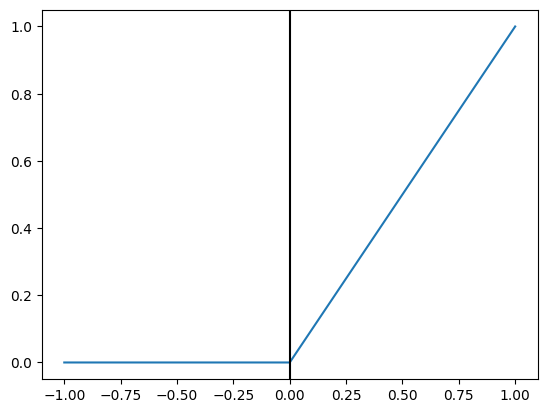

In [ ]:
def rectified_linear_unit(x):
  return max(0.0, x)

x = np.linspace(-1,1,1000)
y = [rectified_linear_unit(x_val) for x_val in x]
plt.plot(x,y)
plt.axvline(0, color='black')

You might be thinking that this still seems very close to a linear function.

However, ReLU doesn't stick to the condition of a linear function that requires
\begin{equation}
f(x) + f(y) = f(x+y),
\end{equation}
because for ReLU $f(-1) + f(1) \neq f(0)$.

This means we avoid the function for our series of neurons collapsing down to just a linear fit, and we have non-linearity!

Now, by increasing the number of layers in our network, and the number of neurons per layer, we're able to effectively reproduce complex functions present in a dataset used for training.

For the rest of this notebook we'll stick to just using ReLU, but I'll show you a couple of other activation functions here:

In [ ]:
### ACTIVATION FUNCTIONS ###

## 1.3 Loss functions
The last part of a basic neural network we need to learn about is the ***loss function*** - this is how our neural network determines how well it is fitting the data.

For a every point in our dataset of $N$ points, each with an $x$ and $y$ value, we show our network the input $x$ and it makes a prediction $\hat{y}$.

A common choice is to take the Mean Squared Error (MSE), averaged over all $N$ points:
\begin{equation}
\textrm{MSE} = \frac{1}{N} \sum_{y=i}^{N} (y_i-\hat{y}_i)^2
\end{equation}

During training, our network tunes the neuron weights and biases in a way that decreases the MSE over the dataset.

I turned off the in-training network printout from the cells for our single neuron, but lets run them again with the printout enabled (setting verbose=1 in model.fit) to see what we get:

In [ ]:
def linear_fit(weight, bias):
  ##### generate inputs #####
  x = np.random.rand(1000)

  ##### generate outputs #####
  y = weight*x + bias

  ##### create tensorflow model #####
  tf.keras.backend.clear_session()
  linear_model = tf.keras.Sequential()#instantiate model

  linear_model.add(tf.keras.Input(1,))#input layer

  linear_model.add(tf.keras.layers.Dense(units=1, activation="linear",))#single dense layer, single neuron, linear activation

  linear_model.compile(loss='mse')

  linear_model.fit(x,y,epochs=50,batch_size=10, verbose=1)

  ##### print neuron weights and biases #####
  print("linear model weight = " + str(linear_model.layers[0].get_weights()[0]))
  print("linear model bias = " + str(linear_model.layers[0].get_weights()[1]))

weight= 0.5 #<--- input value here
bias = 0.8 #<--- input value here

linear_fit(weight, bias)

Epoch 1/50
100/100 [==============================] - 0s 2ms/step - loss: 2.3402
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 1.9051
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 1.5159
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 1.1764
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.8798
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.6293
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4210
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 0.2584
Epoch 9/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1376
Epoch 10/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 11/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 12/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 13/50
100/100 [====

Hopefully, you should get a series of readouts that look something like this:

> Epoch 1/50\
100/100 [==============================] - 1s 2ms/step - loss: 2.2699\
Epoch 2/50\
100/100 [==============================] - 0s 2ms/step - loss: 1.8381\
Epoch 3/50\
100/100 [==============================] - 0s 1ms/step - loss: 1.4577,

with the 'loss' value decreasing each epoch (each pass through the dataset). This is your neural network learning!

# 2 Neural Network Caveats
Now we know what's going on inside a neural network, let's go over the limitations and the approach we need to take for preparing data for training.


## 2.1 Under/Overfitting
One of the main problems in training neural networks is the risk of our network overfitting on data we used to train our network.

The best way to explain this is graphically. Let's say we want to train our neural network to reproduce the function
\begin{equation}
y = \textrm{sin}(x)
\end{equation}
And we take some samples from this function to train our network:

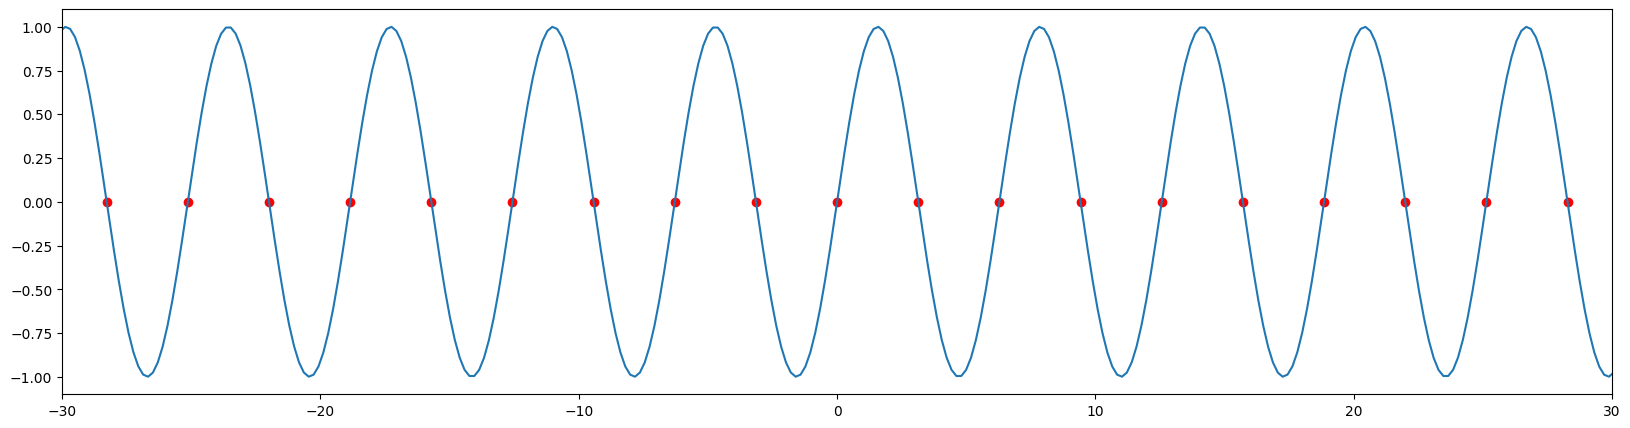

In [ ]:
x = np.linspace(-300*np.pi, 300*np.pi,10000)
y = np.sin(x)

x_train = np.arange(-300*np.pi, 300*np.pi, np.pi)
y_train = np.sin(x_train)

plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.scatter(x_train, y_train, color='red')
plt.xlim(-30,30)
plt.show()

I'm sure you can see the problem here, but these samples technically satisfy our function, in that
\begin{equation}
y_{train} = \textrm{sin}(x_{train}),
\end{equation}
so let's try using these to train a network!

In [ ]:
def sin_fit(layers, neurons_per_layer):
  ##### generate inputs #####
  x_train = np.arange(-300*np.pi, 300*np.pi, np.pi)

  ##### generate outputs #####
  y_train = np.sin(x_train)

  ##### create tensorflow model #####
  tf.keras.backend.clear_session()
  sin_model = tf.keras.Sequential()#instantiate model

  sin_model.add(tf.keras.Input(1,))#input layer

  for layer in range(layers):
    sin_model.add(tf.keras.layers.Dense(units=int(neurons_per_layer), activation="relu",))

  sin_model.add(tf.keras.layers.Dense(1, activation="linear"))

  sin_model.compile(loss='mse')

  sin_model.fit(x_train,y_train,epochs=100,batch_size=10, verbose=1)

  return sin_model

layers = 4 #<--- input value here
neurons_per_layer = 16 #<--- input value here

sin_model = sin_fit(layers, neurons_per_layer)

Epoch 1/100
60/60 [==============================] - 1s 3ms/step - loss: 334.0495
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 3.5443
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 1.9958
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 2.5139
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 2.1221
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 1.9184
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 2.2245
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 1.7432
Epoch 9/100
60/60 [==============================] - 0s 3ms/step - loss: 2.0755
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 1.1422
Epoch 11/100
60/60 [==============================] - 0s 3ms/step - loss: 1.9120
Epoch 12/100
60/60 [==============================] - 0s 3ms/step - loss: 0.8766
Epoch 13/100
60/60 [===============

Depending on the number of layers and neurons you used, these MSE loss values probably look amazing!

Now our network is trained, let's see how well it reproduces the function we used to generate our samples by testing it on some test data, again drawn from our function
\begin{equation}
y_{test} = \textrm{sin}(x_{test})
\end{equation}

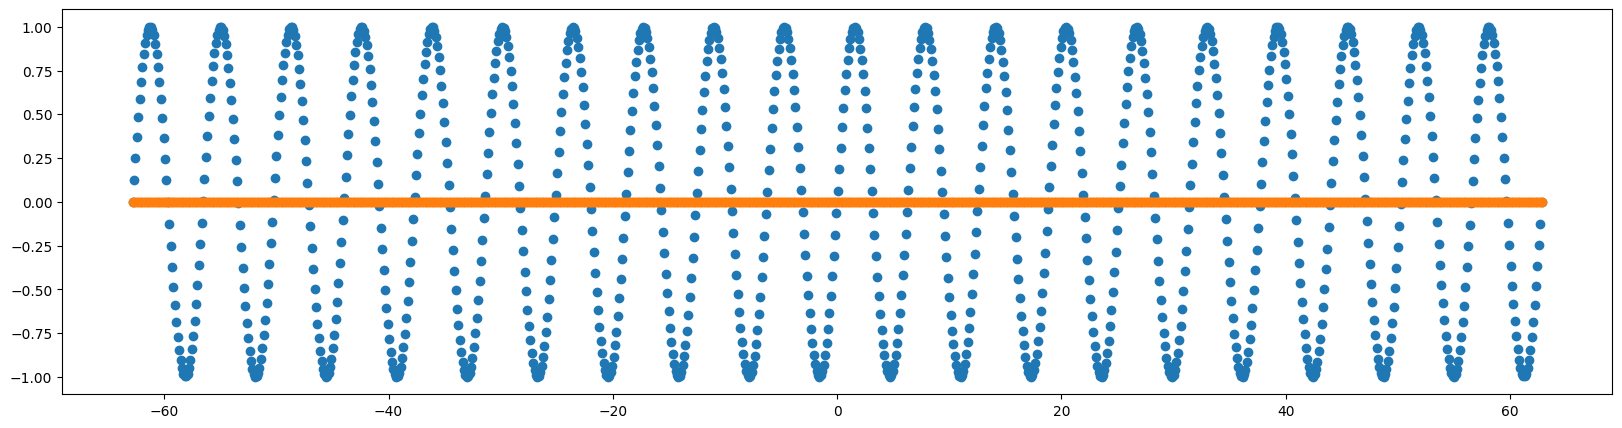

In [ ]:
x_test = np.linspace(-20*np.pi, 20*np.pi,1000)
y_test = np.sin(x_test)

y_pred = np.array(sin_model(x_test)).flatten()

plt.figure(figsize=(20,5))
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)

Not good, our loss score lied to us!

Why has this happened? Our training set *was* representative of our target function, however it also followed the form
\begin{equation}
y_{train} = 0
\end{equation}

This is an extremely easy relationship to learn, and neural networks are lazy (they are modelled after the human brain, after all).

Despite the fact we used the non-linear activation function ReLU and multiple layers each containing multiple neurons, the network realises very quickly that it score very low loss values by just predicting $\hat{y}=0$ for all $x$.

The loss function is all the neural network has to learn to inform its weight and bias tuning, and if the network can find an easier way to lower this loss function than by learning a complex function, it absolutely will!

This is a basic example of overfitting. There was a rogue function that held true for all $x_{train}$ in our training set, but does not generalise well at all to all $x$. The network 'overfits' our training set by learning this non-general function instead of the function we were looking for.

Luckily, we can fix this by being more careful with how we sample our data!

## 2.2 Training/Validation split
The easiest way to see that our network is overfitting is to use a ***validation*** set during training.

Typically, this is a small random sample of our training set which is set aside while the network makes a pass through the remaining training set.

As usual, the network calculates loss on the training set (the ***training loss***), and uses this to inform neuron weight and bias tuning.

Before moving on to the next epoch, the network also evaluates its success on the validation set to produce a ***validation loss***.

If the network is performing well on the training data, but not equally well on the validation data, it suggests our network is overfitting our training set and we should consider how we're sampling our target function.

Let's see what happens if we define a validation set and get our sin_fit network to try again:

In [ ]:
def sin_fit(layers, neurons_per_layer):
  ##### generate inputs #####
  x_train = np.arange(-300*np.pi, 300*np.pi, np.pi)

  np.random.seed(42)
  x_val = np.random.uniform(low=-300*np.pi, high=300*np.pi, size=(100,))

  ##### generate outputs #####
  y_train = np.sin(x_train)
  y_val = np.sin(x_val)

  ##### create tensorflow model #####
  tf.keras.backend.clear_session()
  sin_model = tf.keras.Sequential()#instantiate model

  sin_model.add(tf.keras.Input(1,))#input layer

  for layer in range(layers):
    sin_model.add(tf.keras.layers.Dense(units=int(neurons_per_layer), activation="relu",))

  sin_model.add(tf.keras.layers.Dense(1, activation="linear"))

  sin_model.compile(loss='mse')

  sin_model.fit(x_train,y_train, validation_data = (x_val,y_val), epochs=100,batch_size=10, verbose=1)

  return sin_model

layers = 4 #<--- input value here
neurons_per_layer = 16 #<--- input value here

sin_model = sin_fit(layers, neurons_per_layer)

Epoch 1/100
60/60 [==============================] - 1s 6ms/step - loss: 10.2501 - val_loss: 0.7779
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 4.4457 - val_loss: 1.3506
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 3.6721 - val_loss: 0.5622
Epoch 4/100
60/60 [==============================] - 0s 5ms/step - loss: 3.8014 - val_loss: 0.5186
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 2.9542 - val_loss: 1.6810
Epoch 6/100
60/60 [==============================] - 0s 5ms/step - loss: 2.8736 - val_loss: 3.6222
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 2.1309 - val_loss: 1.0047
Epoch 8/100
60/60 [==============================] - 0s 6ms/step - loss: 2.8642 - val_loss: 0.5417
Epoch 9/100
60/60 [==============================] - 0s 6ms/step - loss: 2.7136 - val_loss: 3.4563
Epoch 10/100
60/60 [==============================] - 0s 4ms/step - loss: 2.2003 - val_loss: 2.6832
Epoch 11

Even though our training loss is decreasing as before, our validation loss (probably) stays the same - this way, we can see during training that our network has overfit the training set.

Let's be more careful in the way we define our training set this time:

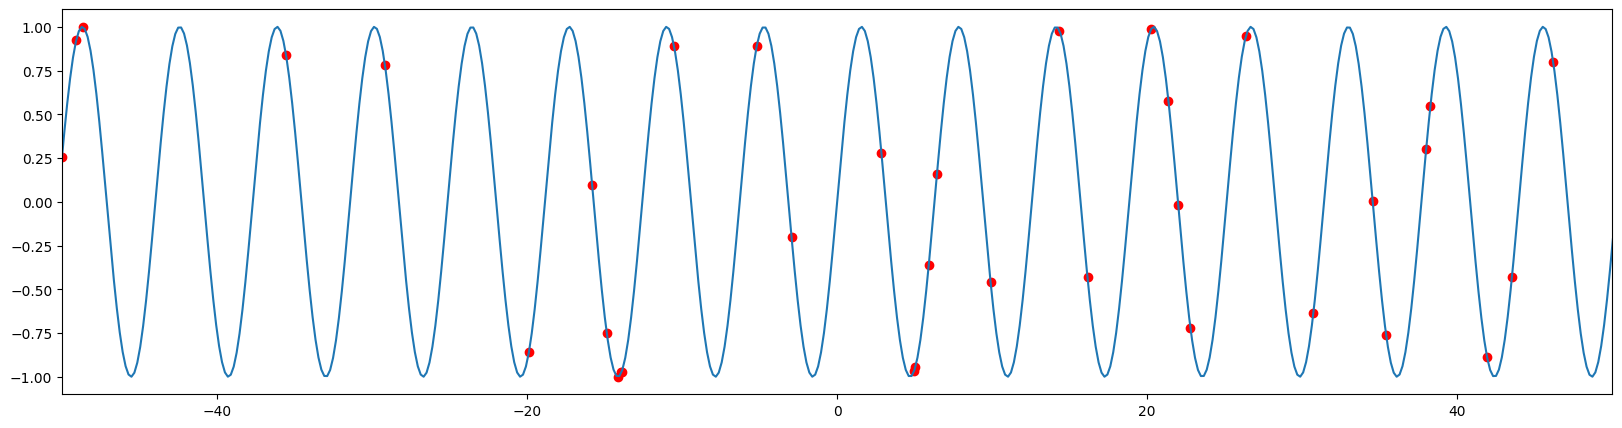

In [ ]:
x = np.linspace(-300*np.pi, 300*np.pi,10000)
y = np.sin(x)

x_train = np.random.uniform(low=-300*np.pi, high=300*np.pi, size=(600,))
y_train = np.sin(x_train)

plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.scatter(x_train, y_train, color='red')
plt.xlim(-50,50)
plt.show()

This looks much better!

Now let's try training a network on this new training set:

In [ ]:
def sin_fit(layers, neurons_per_layer):
  ##### generate inputs #####
  np.random.seed(74)
  x_train = np.random.uniform(low=-10*np.pi, high=10*np.pi, size=(10000,))

  np.random.seed(42)
  x_val = np.random.uniform(low=-10*np.pi, high=10*np.pi, size=(100,))

  ##### generate outputs #####
  y_train = np.sin(x_train)
  y_val = np.sin(x_val)

  ##### create tensorflow model #####
  tf.keras.backend.clear_session()
  sin_model = tf.keras.Sequential()#instantiate model

  sin_model.add(tf.keras.Input(1,))#input layer

  for layer in range(layers):
    sin_model.add(tf.keras.layers.Dense(units=int(neurons_per_layer), activation="relu",))

  sin_model.add(tf.keras.layers.Dense(1, activation="linear"))

  sin_model.compile(loss='mse')

  sin_model.fit(x_train,y_train, validation_data = (x_val,y_val), epochs=100,batch_size=100, verbose=1)

  return sin_model

layers = 10 #<--- input value here
neurons_per_layer = 64 #<--- input value here

sin_model = sin_fit(layers, neurons_per_layer)

Epoch 1/100
100/100 [==============================] - 3s 6ms/step - loss: 0.4933 - val_loss: 0.4897
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.4430 - val_loss: 0.4644
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.4192 - val_loss: 0.4470
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.4018 - val_loss: 0.4572
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3926 - val_loss: 0.4203
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3861 - val_loss: 0.4205
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3810 - val_loss: 0.4235
Epoch 8/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3723 - val_loss: 0.3983
Epoch 9/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3624 - val_loss: 0.4459
Epoch 10/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3549 - val_lo

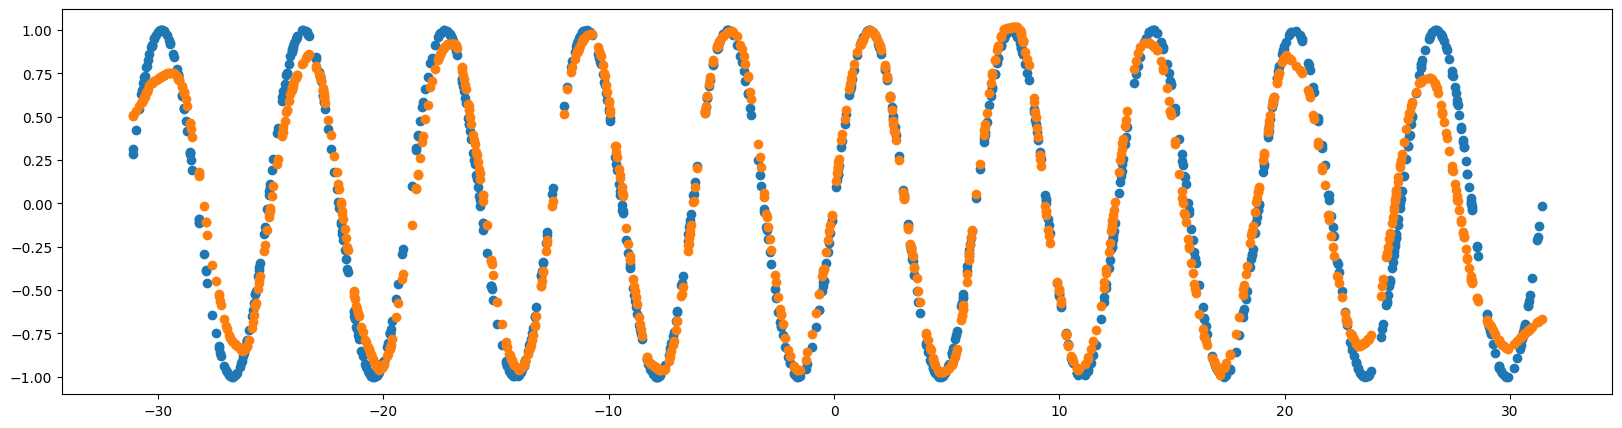

In [ ]:
x_test = np.random.uniform(low=-10*np.pi, high=10*np.pi, size=(1000,))
y_test = np.sin(x_test)

y_pred = np.array(sin_model(x_test)).flatten()

plt.figure(figsize=(20,5))
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)

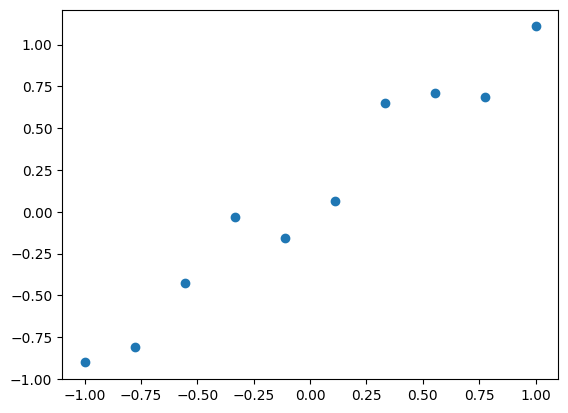

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 0.4353
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 0.4073
Epoch 3/300
1/1 [==============================] - 0s 12ms/step - loss: 0.6110
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 0.3795
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 0.4218
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 0.4444
Epoch 7/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4190
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 0.3635
Epoch 9/300
1/1 [==============================] - 0s 12ms/step - loss: 0.2927
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 0.3223
Epoch 11/300
1/1 [==============================] - 0s 10ms/step - loss: 0.3100
Epoch 12/300
1/1 [==============================] - 0s 12ms/step - loss: 0.3718
Epoch 13/300
1/1 [==============================] -

In [ ]:
np.random.seed(42)
x_train = np.linspace(-1,1,10)

y_train = x_train + np.random.normal(loc=0, scale=0.2, size=10)

# x_train = np.arange(-300*np.pi, 300*np.pi, np.pi)
# y_train = np.sin(x_train)

#plt.figure(figsize=(20,5))
plt.scatter(x_train,y_train)
#plt.scatter(x_train, y_train, color='red')
#plt.xlim(-30,30)
plt.show()

def x_fit(x_train, y_train, layers, neurons_per_layer):
#### create tensorflow model #####
  tf.keras.backend.clear_session()
  x_model = tf.keras.Sequential()#instantiate model

  x_model.add(tf.keras.Input(1,))#input layer

  for layer in range(layers):
    x_model.add(tf.keras.layers.Dense(units=int(neurons_per_layer), activation="relu",))

  x_model.add(tf.keras.layers.Dense(1, activation="linear"))

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
  x_model.compile(loss='mse', optimizer=optimizer)

  x_model.fit(x_train,y_train,epochs=300,batch_size=10, verbose=1,shuffle=True)

  return x_model

layers = 8 #<--- input value here
neurons_per_layer = 8 #<--- input value here

x_model = x_fit(x_train, y_train, layers, neurons_per_layer)

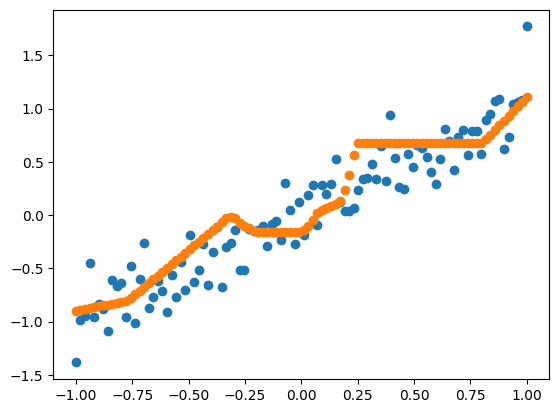

In [ ]:
x_test = np.linspace(-1,1,100)

y_test = x_test + np.random.normal(loc=0, scale=0.2, size=100)

y_pred = np.array(x_model(x_test)).flatten()

plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)

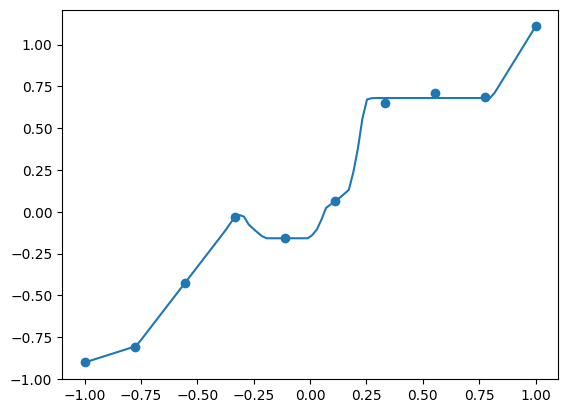

In [ ]:


#plt.figure(figsize=(20,5))
plt.plot(x_test,y_pred)
plt.scatter(x_train,y_train)
#plt.scatter(x_train, y_train, color='red')
#plt.xlim(-30,30)
plt.show()

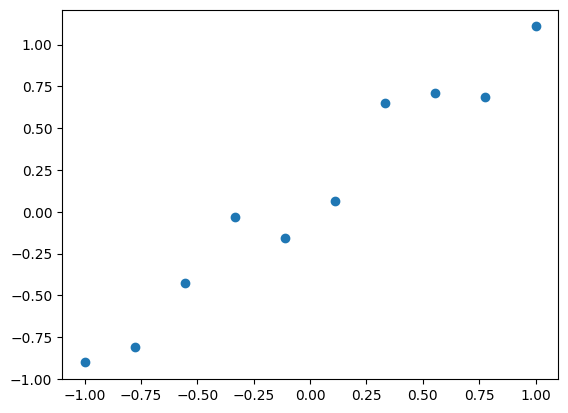

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.4292
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 0.4213
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 0.4258
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4255
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 0.4223
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 0.4212
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 0.4225
Epoch 8/300
1/1 [==============================] - 0s 13ms/step - loss: 0.4237
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 0.4232
Epoch 10/300
1/1 [==============================] - 0s 9ms/step - loss: 0.4218
Epoch 11/300
1/1 [==============================] - 0s 9ms/step - loss: 0.4212
Epoch 12/300
1/1 [==============================] - 0s 10ms/step - loss: 0.4216
Epoch 13/300
1/1 [==============================] - 0s 

In [ ]:
np.random.seed(42)
x_train = np.linspace(-1,1,10)

y_train = x_train + np.random.normal(loc=0, scale=0.2, size=10)

# x_train = np.arange(-300*np.pi, 300*np.pi, np.pi)
# y_train = np.sin(x_train)

#plt.figure(figsize=(20,5))
plt.scatter(x_train,y_train)
#plt.scatter(x_train, y_train, color='red')
#plt.xlim(-30,30)
plt.show()

def x_fit(x_train, y_train, layers, neurons_per_layer):
#### create tensorflow model #####
  tf.keras.backend.clear_session()
  x_model = tf.keras.Sequential()#instantiate model

  x_model.add(tf.keras.Input(1,))#input layer

  for layer in range(layers):
    x_model.add(tf.keras.layers.Dense(units=int(neurons_per_layer), activation="relu",))

  x_model.add(tf.keras.layers.Dense(1, activation="linear"))

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
  x_model.compile(loss='mse', optimizer=optimizer)

  x_model.fit(x_train,y_train,epochs=300,batch_size=10, verbose=1,shuffle=True)

  return x_model

layers = 2 #<--- input value here
neurons_per_layer = 2 #<--- input value here

x_model = x_fit(x_train, y_train, layers, neurons_per_layer)

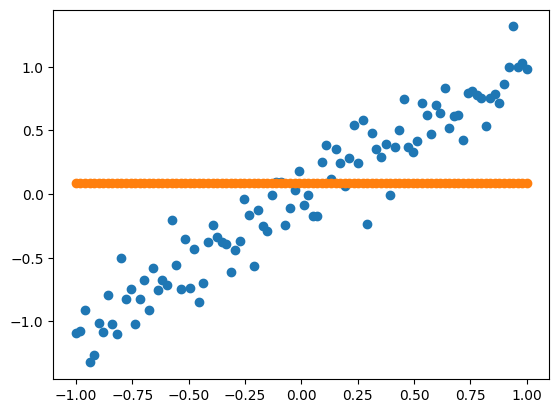

In [ ]:
x_test = np.linspace(-1,1,100)

y_test = x_test + np.random.normal(loc=0, scale=0.2, size=100)

y_pred = np.array(x_model(x_test)).flatten()

plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)

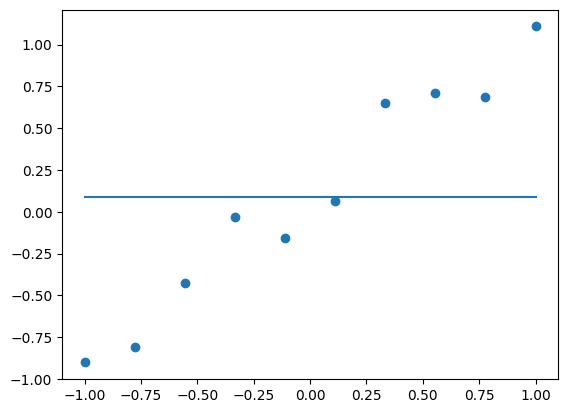

pred_mean = 0.089612216
train_mean = 0.0896122223397512


In [ ]:


#plt.figure(figsize=(20,5))
plt.plot(x_test,y_pred)
plt.scatter(x_train,y_train)
#plt.scatter(x_train, y_train, color='red')
#plt.xlim(-30,30)
plt.show()
print("pred_mean = "+str(np.mean(y_pred)))
print("train_mean = "+str(np.mean(y_train)))